In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
#  Import and read the Clean_Household_Data.csv.
import pandas as pd 
household_df = pd.read_csv("../Resources/Clean_Household_Data.csv")
household_df.head()

,ID,protocol id,series_ref,quarter,expenditures,groups,index,quarterly,annually,year
0,0,All households,HPIQ.SALL01,1,Food,group,1034,1.3,1.2,2019
1,1,All households,HPIQ.SALL01,2,Food,group,1038,0.4,1.0,2019
2,2,All households,HPIQ.SALL01,3,Food,group,1052,1.3,1.6,2019
3,3,All households,HPIQ.SALL01,4,Food,group,1047,-0.5,2.5,2019
4,4,All households,HPIQ.SALL01,1,Food,group,1068,2.0,3.3,2020


In [3]:
# Drop the non-beneficial ID columns "series_ref"
household_df = household_df.drop(columns=["series_ref"])
household_df.head()

,ID,protocol id,quarter,expenditures,groups,index,quarterly,annually,year
0,0,All households,1,Food,group,1034,1.3,1.2,2019
1,1,All households,2,Food,group,1038,0.4,1.0,2019
2,2,All households,3,Food,group,1052,1.3,1.6,2019
3,3,All households,4,Food,group,1047,-0.5,2.5,2019
4,4,All households,1,Food,group,1068,2.0,3.3,2020


In [4]:
# Determine the number of unique values in each column.
household_df.nunique()

ID              12810
protocol id        14
quarter             4
expenditures       59
groups              4
index            1113
quarterly         303
annually          473
year                4
dtype: int64

In [14]:
# Specify the features columns
X = household_df.drop(columns = [household_df.columns[-1]])

# Specify the target column
y = household_df.iloc[:,-1]

# Transform non-numerical columns into binary-type columns
X = pd.get_dummies(X)

# Divide data set into traning and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, train_size = 100)

In [15]:
# Import data scaling technique class
from sklearn.preprocessing import MaxAbsScaler

# Instantiate data scaler
scaler = MaxAbsScaler()

# Fit the Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Import data resampling class
from imblearn.over_sampling import ADASYN

# Instantiate data resampler technique
adasyn = ADASYN()

# Resample training sets
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

In [17]:
# Import machine learning model class
from sklearn.ensemble import AdaBoostClassifier

# Instantiate machine learning model
abc = AdaBoostClassifier()

# Fit the machine learning model with the training data
abc.fit(X_resampled, y_resampled)

# Make predictions using the testing data
y_pred = abc.predict(X_test_scaled)

In [18]:
# Calculate balanced accuracy scrore
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

# Display the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Display the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

0.3053770766240342
[[1187 1431  586  188]
 [1183 1377  615  205]
 [1276  957  776  388]
 [1040  324  578  599]]
                   pre       rec       spe        f1       geo       iba       sup

       2019       0.25      0.35      0.62      0.29      0.47      0.21      3392
       2020       0.34      0.41      0.71      0.37      0.54      0.28      3380
       2021       0.30      0.23      0.81      0.26      0.43      0.17      3397
       2022       0.43      0.24      0.92      0.31      0.47      0.20      2541

avg / total       0.33      0.31      0.76      0.31      0.48      0.22     12710



<AxesSubplot:ylabel='Density'>

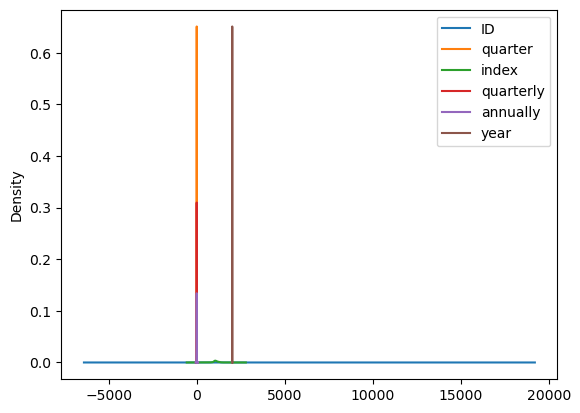

In [21]:
household_df.plot.density()